##  Teleportation - Circuit

In [4]:
%matplotlib inline
import numpy as np
import IPython
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister
from qiskit import BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import seaborn as sns
sns.set()

In [5]:
from helper import *

### 1. Hadamard Gate (first qubit)

In [6]:
def circuit1():
    qc = QuantumCircuit(2,2)
    qc.h(0)
    return qc

#### 1.1 Circuit diagram

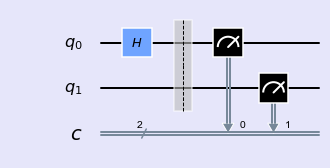

In [7]:
hqc = circuit1()
drawCircuit_2q(hqc)

#### 1.2 Two qubit system (state vector)

<div class="alert alert-block alert-success">
    <ul>
        <li> Initial state: $|00 \rangle$  </li>
        <li> After Hadamard Gate: $\frac{1}{\sqrt{2}}|00 \rangle + \frac{1}{\sqrt{2}}|01 \rangle $ </li>
    </ul>
</div>

In [8]:
hqc = circuit1()
writeState(hqc)

HTMLMath(value='$$\\text{State:\n $|\\Psi\\rangle = $}(0.707+0i)|00\\rangle + (0.707+0i)|01\\rangle$$')

<div class="alert alert-block alert-warning">
$\textbf{Exercise:}$ Find the phase diagram for before and after application of Hadamard gate?
</div>

#### 1.2 Measurement Simulation

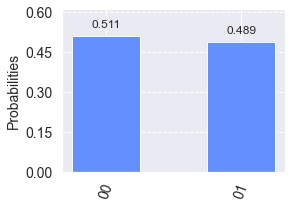

In [9]:
hqc = circuit1()
simCircuit(hqc)

#### 1.3 Tensor Product of single qubit states

<div class="alert alert-block alert-warning">
$\textbf{Exercise:}$ Write the final state as tensor product of single qubit final state. The bloch sphere representation of final state of qubit is ploted below.
</div>

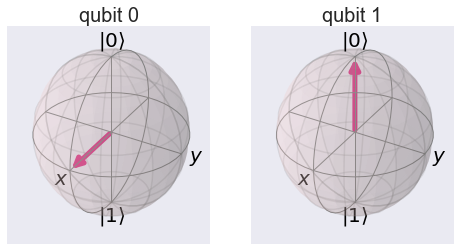

In [10]:
hqc = circuit1()
blochSphere(hqc)

#### 1.4 Matrix Representation

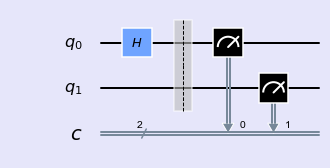

In [11]:
hqc = circuit1()
drawCircuit_2q(hqc)

<div class="alert alert-block alert-info">
Based on above circuit, lets construct the matrix representation of the circuit using fundamental gates matrices involved in the circuit.

$H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 1 \\
    1 & -1
\end{bmatrix}; I = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 0 \\
    0 &  1
\end{bmatrix}$

Final Matrix to represent the quantum circuit

$ U = I \otimes H$ = $ \begin{bmatrix}
    H  & 0 \\
    0 & H
\end{bmatrix}$
    
</div>

In [12]:
I = np.eye(2,2)
H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
U = np.kron(I,H)
print(U)

[[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.70710678 -0.70710678  0.         -0.        ]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.         -0.          0.70710678 -0.70710678]]


In [13]:
ket_00 = np.array([1,0,0,0])
np.dot(U,ket_00)

array([0.70710678, 0.70710678, 0.        , 0.        ])

<div class="alert alert-block alert-info">
Infact we can check our matrix from our circuit shown below by implementing Q is kit's "unitary_simulator".
</div>

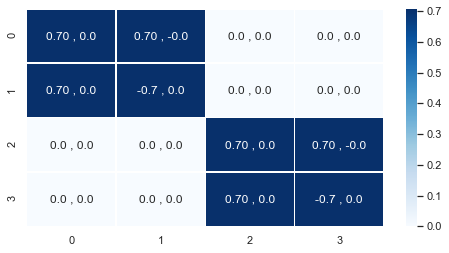

In [14]:
hqc = circuit1()
plotMatrix(hqc)

### 2. Hadamard Gate (second qubit)

<div class="alert alert-block alert-warning">
$\textbf{Exercise:}$ Find the circuit diagram, state vector, measurement simulation and matrix representation for 2-qubit circuit with H gate applied to second qubit.
</div>

### 3. Hadamard Gate (both qubit)

#### 3.1 Define circuit

In [15]:
def circuit2():
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.h(1)
    return qc

#### 3.2 Circuit Diagram

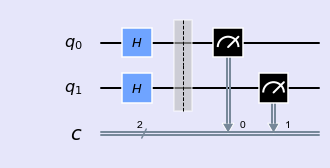

In [16]:
hqc = circuit2()
drawCircuit_2q(hqc)

#### 3.3 State vector (ket, phase and measurement)

Lets perform some manual approach for final state in ket notation.

<div class="alert alert-block alert-success">
    <ul>
        <li> Initial state: $|0 \rangle$  </li>
        <li> After Hadamard Gate: $\frac{1}{\sqrt{2}}|0 \rangle + \frac{1}{\sqrt{2}}|1 \rangle $ </li>
    </ul>
</div>

In [17]:
hqc = circuit2()
writeState(hqc)

HTMLMath(value='$$\\text{State:\n $|\\Psi\\rangle = $}(0.5+0i)|00\\rangle + (0.5+0i)|01\\rangle + (0.5+0i)|10\…

 ##### 3.3.1 Phase

In [18]:
def getPhaseSeq():
    phaseDic = []
    
    qc0 = QuantumCircuit(2,2)
    
    qc1 = QuantumCircuit(2,2)
    qc1.h(0)
    qc1.h(1)
    
    for iqc in [qc0,qc1]:
        phaseDic.append(getPhase(iqc))
    return phaseDic    

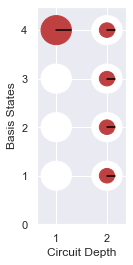

In [19]:
drawPhase(getPhaseSeq())

#### 3.3.3 Measurement simulation

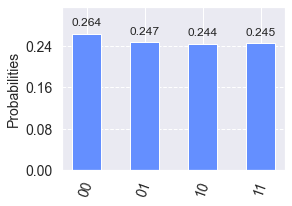

In [20]:
hqc = circuit2()
simCircuit(hqc)

#### 3.3.4 State vector  as tensor product

<div class="alert alert-block alert-info">
    
 Since this circuit consists of pure superposition brought up by hadamard gate, it is possible to obtain final state vector by taking direct product of single qubit states. Results from operation of H gate on single qubit can be multiplied with direct product operation to get final state.
    
$ \frac{1}{\sqrt{2}} (|0 \rangle + | 1\rangle) \otimes \frac{1}{\sqrt{2}}(|0 \rangle + | 1\rangle) = \frac{1}{2}(|00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle $
    

i.e., $\frac{1}{\sqrt{2}}\begin{bmatrix}
    1   \\
    1 
\end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix}
    1   \\
    1 
\end{bmatrix} = \frac{1}{2} \begin{bmatrix}
    1   \\
    1 \\
    1 \\
    1
\end{bmatrix}$

Where $|00 \rangle , |01 \rangle , |10 \rangle $ and $ |11 \rangle $ are basis states for two qubit system.
</div>

#### 3.4 Matrix Element

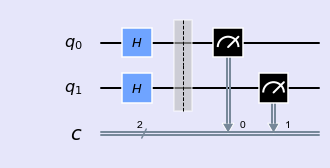

In [21]:
hqc = circuit2()
drawCircuit_2q(hqc)

<div class="alert alert-block alert-info">
Based on above Bell circuit, lets construct the matrix representation of the circuit using fundamental gates matrices involved in the circuit.

$H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 1 \\
    1 & -1
\end{bmatrix}$

- Matrix representation of above quantum circuit

$ U  = H \otimes H$ = $ \begin{bmatrix}
    H  &  H \\
    H &  -H
\end{bmatrix}$
    
</div>

In [22]:
H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
U = np.kron(H,H)
print(U)

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]


In [23]:
ket = np.array([1,0,0,0])
np.dot(U,ket)

array([0.5, 0.5, 0.5, 0.5])

<div class="alert alert-block alert-info">
Infact we can check our matrix from our circuit shown below by implementing Q is kit's "unitary_simulator".
</div>

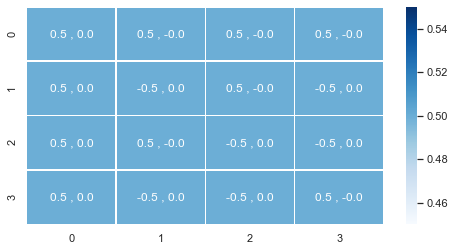

In [24]:
hqc = circuit2()
plotMatrix(hqc)

### 4. Hadamard Gate (3 qubits)

Consider a 3 qubits quantum circuit with H gate applied to each qubit.

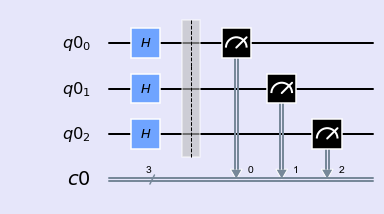

In [25]:
n = 3
q = QuantumRegister(n)
c = ClassicalRegister(n)
hqc3 = QuantumCircuit(q,c)
for k in range(3):
    hqc3.h(q[k])
hqc3.barrier()
hqc3.measure(q,c)
style = {'backgroundcolor': 'lavender'}
hqc3.draw(output='mpl', style = style)

<div class="alert alert-block alert-warning">
$\textbf{Exercise:}$ Using above quantum circuit, find final state vector in ket notation, phase plot and measurement simulation histogram.
</div>

<div class="alert alert-block alert-warning">
$\textbf{Exercise:}$ Using above circuit, find final state vector by implementing tensor product of three single qubit states.
    
$\textbf{Hint}$: $| \psi \rangle =  \frac{1}{\sqrt{2}} (|0 \rangle + | 1\rangle) \otimes \frac{1}{\sqrt{2}} (|0 \rangle + | 1\rangle)  \otimes \frac{1}{\sqrt{2}} (|0 \rangle + | 1\rangle) $
</div>

<div class="alert alert-block alert-warning">
$\textbf{Exercise:}$ Using above circuit, find matrix representation of the quantum circuit by implementing tensor product of fundamental gate matrices.
    
$\textbf{Hint}$: $U = H \otimes H \otimes H $ 
</div>

### 5. Hadamard gate (n qubit)

#### 5.1 n-qubits initiated at $|0 \rangle$

<div class="alert alert-block alert-info">


When applied to a register of ${\displaystyle n}$ qubits all initialized to ${\displaystyle |0\rangle }$ , the Hadamard transform puts the quantum register into a superposition with equal probability of being measured in any of its ${\displaystyle 2^{n}}$ possible states:

$ \underbrace{|0 \rangle \otimes |0 \rangle ...\otimes|0 \rangle}_{n -times} = \bigotimes _{0}^{n-1}|0\rangle = |0\rangle^{\otimes n}$


#### 5.2 Hadamard on $n$ qubits register

<div class="alert alert-block alert-info">


By representing Hadamard gate as $H$ which operates on a single qubit, we can express operation of Hadamard gate on n-qubit system with H-gate on each qubit.

${\displaystyle \underbrace {H\otimes H\otimes \dots \otimes H} _{n{\text{ times}}}=\bigotimes _{1}^{n}H=H^{\otimes n}=H_{n}}$

In other words, it is a Hadamard transformation on a quantum register of $n$ qubits.

#### 5.3  Hadamard on all qubits initiates at at state $|0 \rangle$

<div class="alert alert-block alert-info">
When applied to a register of ${\displaystyle n}$ qubits all initialized to ${\displaystyle |0\rangle }$ , the Hadamard transform puts the quantum register into a superposition with equal probability of being measured in any of its ${\displaystyle 2^{n}}$ possible states:

${\displaystyle \bigotimes _{0}^{n-1}H\bigotimes _{0}^{n-1}|0\rangle =  {\frac {1}{\sqrt {2^{n}}}}{\begin{bmatrix}1\\1\\\vdots \\1\end{bmatrix}}={\frac {1}{\sqrt {2^{n}}}}{\Big (}|0\rangle +|1\rangle +\dots +|2^{n}-1\rangle {\Big )}={\frac {1}{\sqrt {2^{n}}}}\sum _{i=0}^{2^{n}-1}|i\rangle } $
    
Or, 

${\displaystyle H^{\otimes n} |0 \rangle^{\otimes n} = {\frac {1}{\sqrt {2^{n}}}}\sum _{i=0}^{2^{n}-1}|i\rangle} $   

#### 5.4 Structure of Hadamard matrix

<div class="alert alert-block alert-info">
    
Some examples of the Hadamard matrices.

${\displaystyle {\begin{aligned}H_{0}=+&{\begin{pmatrix}{\begin{array}{r}1\end{array}}\end{pmatrix}}\\H_{1}={\frac {1}{\sqrt {2}}}&{\begin{pmatrix}{\begin{array}{rr}1&1\\1&-1\end{array}}\end{pmatrix}}\\H_{2}={\frac {1}{2}}&{\begin{pmatrix}{\begin{array}{rrrr}1&1&1&1\\1&-1&1&-1\\1&1&-1&-1\\1&-1&-1&1\end{array}}\end{pmatrix}}\\H_{3}={\frac {1}{2^{\frac {3}{2}}}}&{\begin{pmatrix}{\begin{array}{rrrrrrrr}1&1&1&1&1&1&1&1\\1&-1&1&-1&1&-1&1&-1\\1&1&-1&-1&1&1&-1&-1\\1&-1&-1&1&1&-1&-1&1\\1&1&1&1&-1&-1&-1&-1\\1&-1&1&-1&-1&1&-1&1\\1&1&-1&-1&-1&-1&1&1\\1&-1&-1&1&-1&1&1&-1\end{array}}\end{pmatrix}}\\\left(H_{n}\right)_{i,j}={\frac {1}{2^{\frac {n}{2}}}}&(-1)^{i\cdot j}\end{aligned}}}$
